<h1>CS 41344 - Natural Language Processing</h1>
<h2 style = 'color:yellow'>1.3 Vectorization</h2>

<ul>
    <li>Vector Math</li>
    <li>Vectorization Zipf Law</li>
    <li>NLP Pipeline + Text Cleaning</li>
    <li>Count + nGram Vectorizer</li>
    <li>TF + IDF Vectorization</li>
</ul>

<h3 style = 'color:lightgreen'>1.3.0 Import Libraries</h3>

In [143]:
from IPython.display import Image, display
import numpy as np
import pandas as pd
from textblob import TextBlob
import nltk
import pandas as pd
import math
import string
import re

from collections import OrderedDict
from operator import itemgetter
from wordcloud import WordCloud
from textblob.sentiments import NaiveBayesAnalyzer
from textblob import Word
from nltk.stem import PorterStemmer

from PIL import Image as Im
import imageio
from matplotlib import pyplot as plt
from datascience import *

import spacy
from textatistic import Textatistic

from nltk.tokenize import TreebankWordTokenizer

from sklearn.feature_extraction.text import CountVectorizer

In [82]:
nltk.download('punkt')
nltk.download('brown')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.corpus import brown

nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!

<h3 style = 'color:lightgreen'>1.3.1 Vector Math</h3>

In this section, we will cover the following - 

<b>Vector Math</b>
<ul>
    <li>Euclidean Distance</li>
    <li>Cosine Distance</li>
    <li>Manhattan Distance</li>
</ul>

<b>Bag of Words</b>
<ul>
    <li>Term Frequency</li>
    <li>Count Vectorizer</li>
</ul>

The key questions we are trying to answer are:
1. Which words are most important in a document?
2. Based on a user specified query,
   a. Which documents are more relevant to the query?
   b. Problem solved by Google Search Engine.



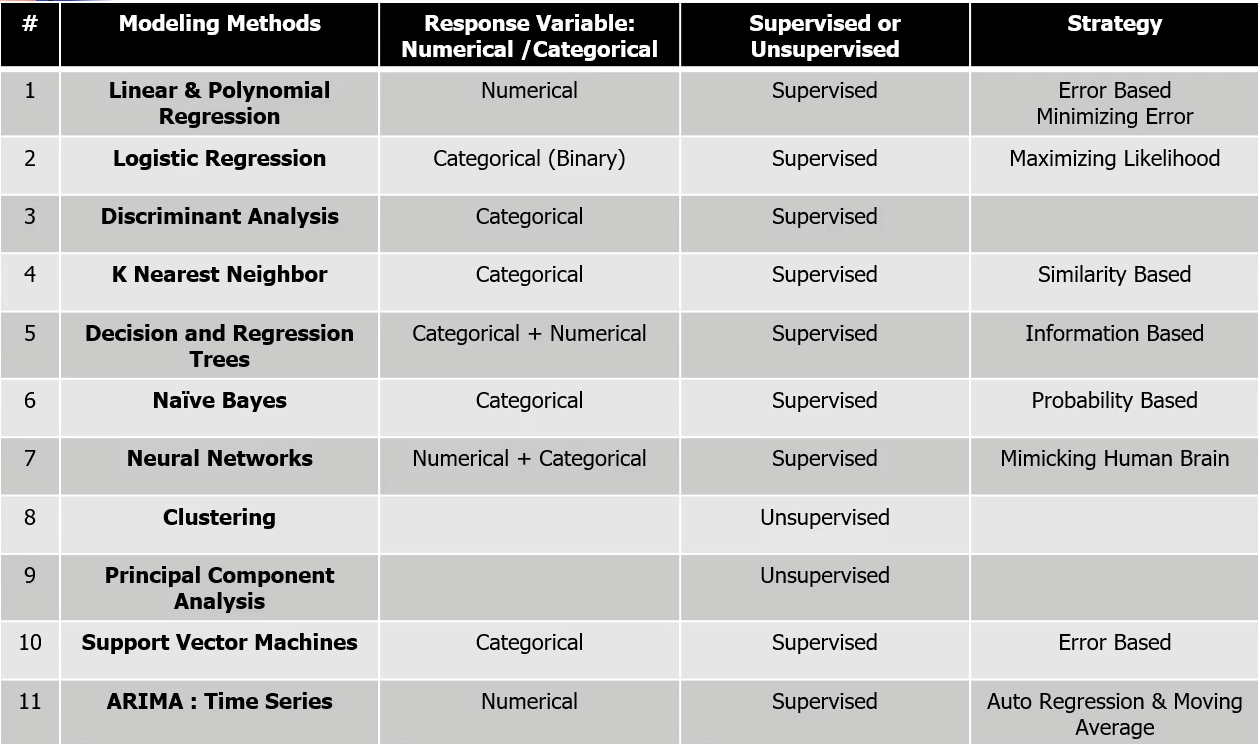

In [3]:
Image("../3. Images/ML Models.png")

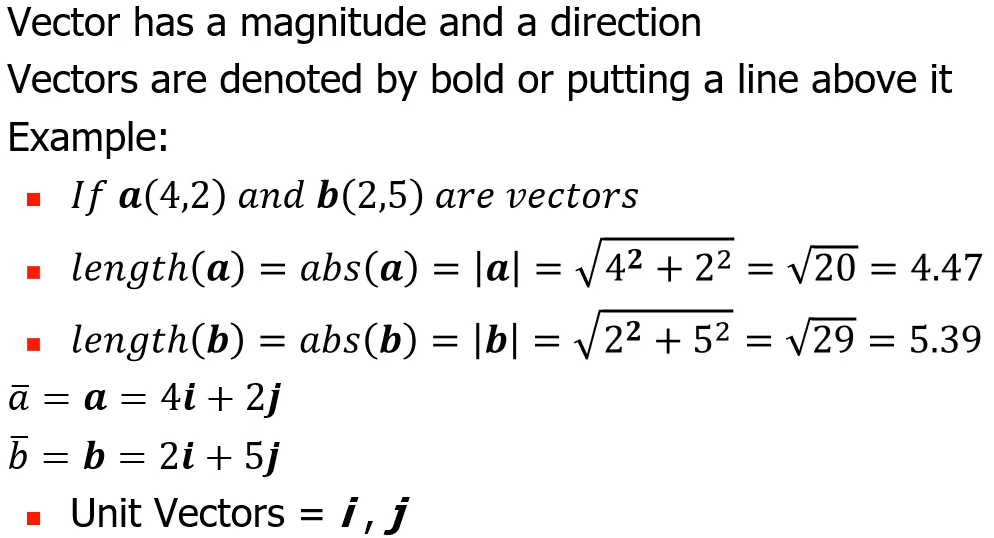

In [4]:
Image("../3. Images/Vectors.png")

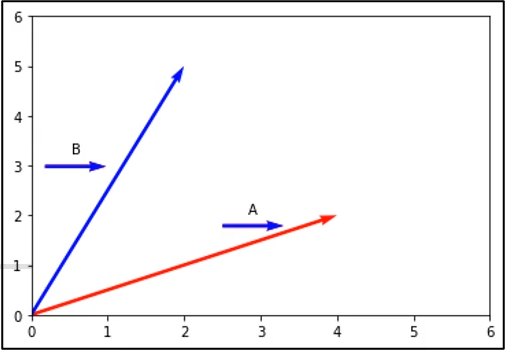

In [5]:
Image("../3. Images/Vectors - 2.png")

In [6]:
A = np.array([4, 2])
B = np.array([2, 5])

x1 = A[0]; x2 = B[0]; y1 = A[1]; y2 = B[1]

# Plot two vectors from 0, 0 to x1, y1 and x2, y2
QV1 = plt.quiver([0, 0], [0, 0], [x1, x2], [y1, y2], angles='xy', scale_units='xy', scale=1, color=['r', 'b'])

plt.xlim([0,6])
plt.ylim([0,6])
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title('Vectors', fontsize=16)
plt.quiverkey(QV1, 0.5, 0.35, 0.8, 'A', coordinates='figure')
plt.quiverkey(QV1, 0.2, 0.5, 0.8, 'B', coordinates='figure')
display(plt.gcf())
plt.savefig('vector_plot.png')

<Figure size 640x480 with 1 Axes>

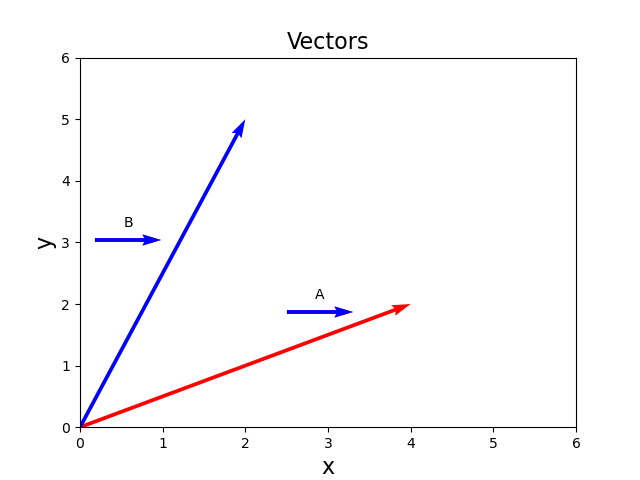

In [7]:
Image(r"H:\AI\NLP\UCSD\ucsd_nlp\1. Modules\vector_plot.png")

Once you have the vectors, you can perform two mathematical operations on them:

1. Dot Product
2. Cross Product

To calculate the dot product of two vectors, we calculate norm of each vector and then multiply with the Cosine theta (angle between the two vectors).

In [8]:
a = np.array([4, 2])
b = np.array([2, 5])

print(f"Dot Product: {np.dot(a, b)}")

Dot Product: 18


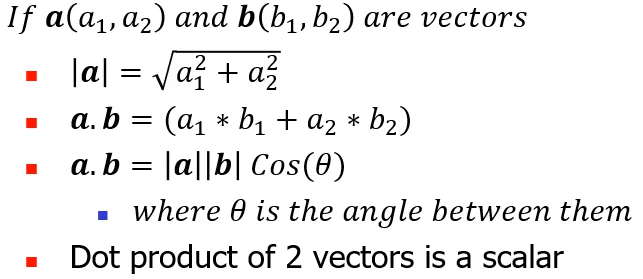

In [9]:
Image("../3. Images/Dot Product - 1.png")

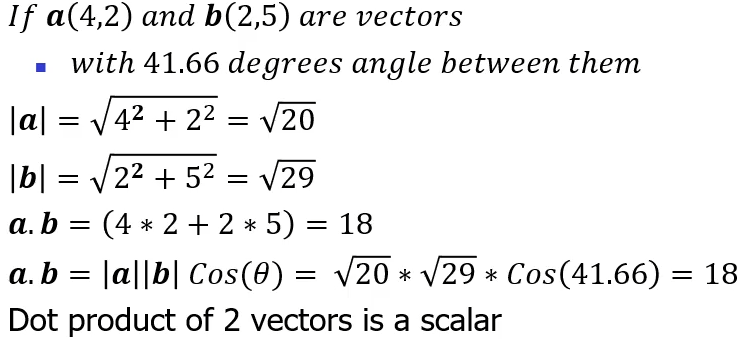

In [10]:
Image("../3. Images/Dot Product - 2.png")

Distance metrics:

1. Euclidean Distance
2. Cosine Distance
3. Manhattan Distance

In [11]:
# Create a 1-D Vector

np.arange(0.5, 4, 1)

array([ 0.5,  1.5,  2.5,  3.5])

In [12]:
# Create a 2-D Vector

x = np.array([range(4), range(4)])
print(x)

[[0 1 2 3]
 [0 1 2 3]]


In [13]:
# Transpose the 2-D Vector

x.T

array([[0, 0],
       [1, 1],
       [2, 2],
       [3, 3]])

In [14]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
A

array([[1, 2, 3],
       [4, 5, 6]])

In [15]:
A.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [16]:
# Calculate the difference between two vectors in a matrix

np.diff(A, axis = 0)

array([[3, 3, 3]])

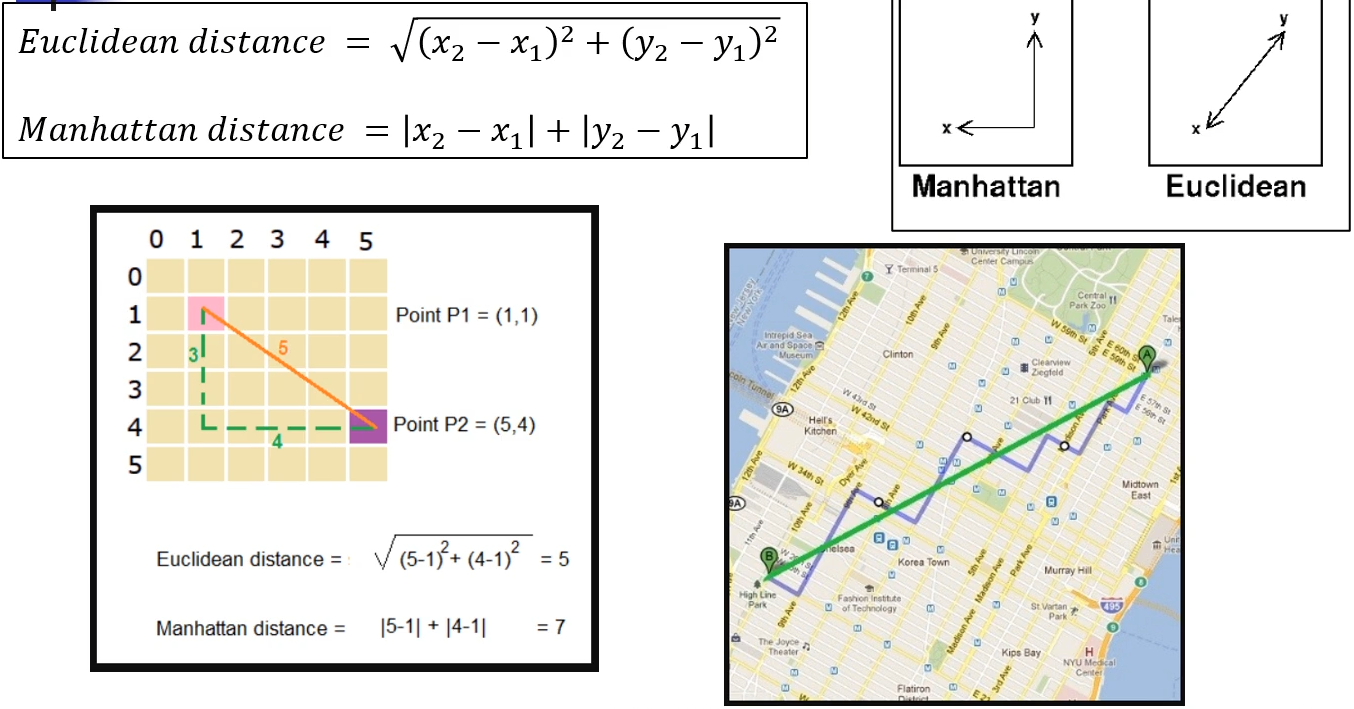

In [17]:
Image("../3. Images/Distance Between Vectors.png")

In [20]:
v1 = np.array([4, 5, 6])
v2 = np.array([1, 2, 3])

# Calculate Euclidean Distance
np.linalg.norm(v1 - v2)

5.196152422706632

In [21]:
np.sqrt(np.sum((v1 - v2)**2))

5.196152422706632

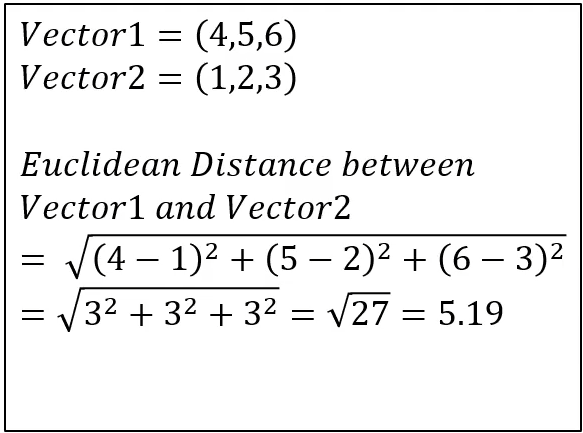

In [22]:
Image("../3. Images/Euclidean Distance.png")

<b>Cosine similarity</b> is a way to measure how similar two vectors are, particularly in the context of text or documents. It's a similarity metric that focuses on the direction of vectors rather than their magnitude. In very simple terms:

- Imagine you have two vectors (A and B), and you want to know how similar they are in terms of the angles they make with the origin (0,0) in a multi-dimensional space.

- Cosine similarity measures this similarity by calculating the cosine of the angle between the two vectors. If the vectors have a small angle (close direction), the cosine value is close to 1, indicating high similarity. If the angle is close to 90 degrees (opposite directions), the cosine value is close to 0, indicating low similarity.

Here's why you might use cosine similarity instead of Euclidean distance or Manhattan distance:

1. **Focus on Direction, Not Magnitude:** Cosine similarity is particularly useful when you care more about the orientation or pattern of data rather than the magnitude (length) of the vectors. In contrast, Euclidean and Manhattan distances consider both direction and magnitude.

2. **Robust to Vector Length:** Cosine similarity is robust to variations in vector lengths. It's not affected by the scale of the vectors, which can be a problem with Euclidean distance. In text analysis, for example, the length of documents can vary greatly, but cosine similarity still works well.

3. **Common in Text Analysis:** Cosine similarity is commonly used in natural language processing (NLP) and information retrieval. It's effective for comparing text documents (e.g., articles, documents, or web pages) based on the frequency of words or terms they contain. Using Euclidean or Manhattan distance for text data is less common and may not work as effectively.

However, it's important to choose the similarity metric that fits your specific problem and data. If both direction and magnitude are relevant, or if you have non-textual data, then Euclidean distance or Manhattan distance may be more suitable. The choice of similarity metric depends on the nature of your data and the goals of your analysis.

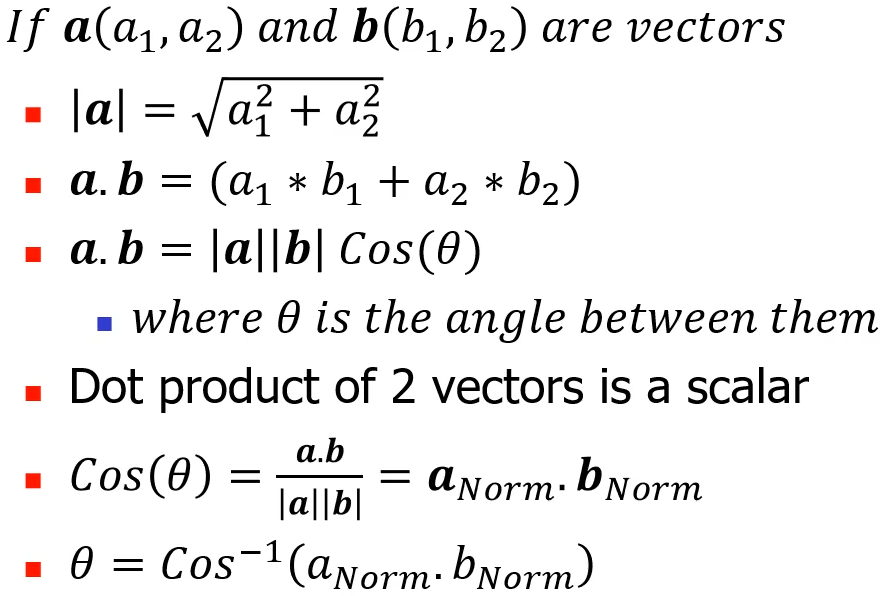

In [23]:
# Cosine Distance

Image("../3. Images/Cosine Distance.png")

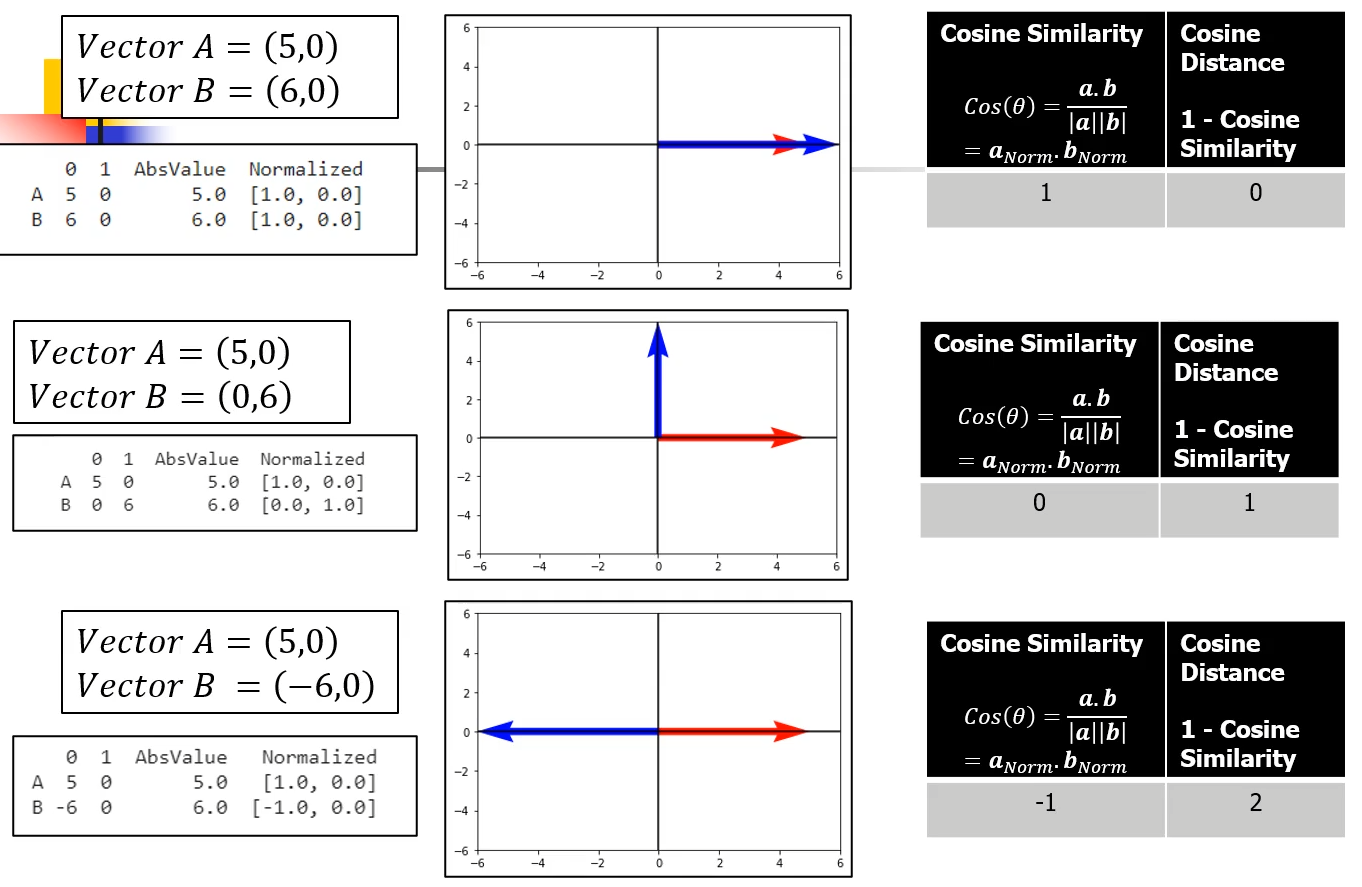

In [24]:
Image("../3. Images/Cosine Similarity and Distance.png")

In Search Engines, we are often asked to determine which documents (websites) are more relevant to a given query. This can be determined by measureing the cosine similarity between two vectors.

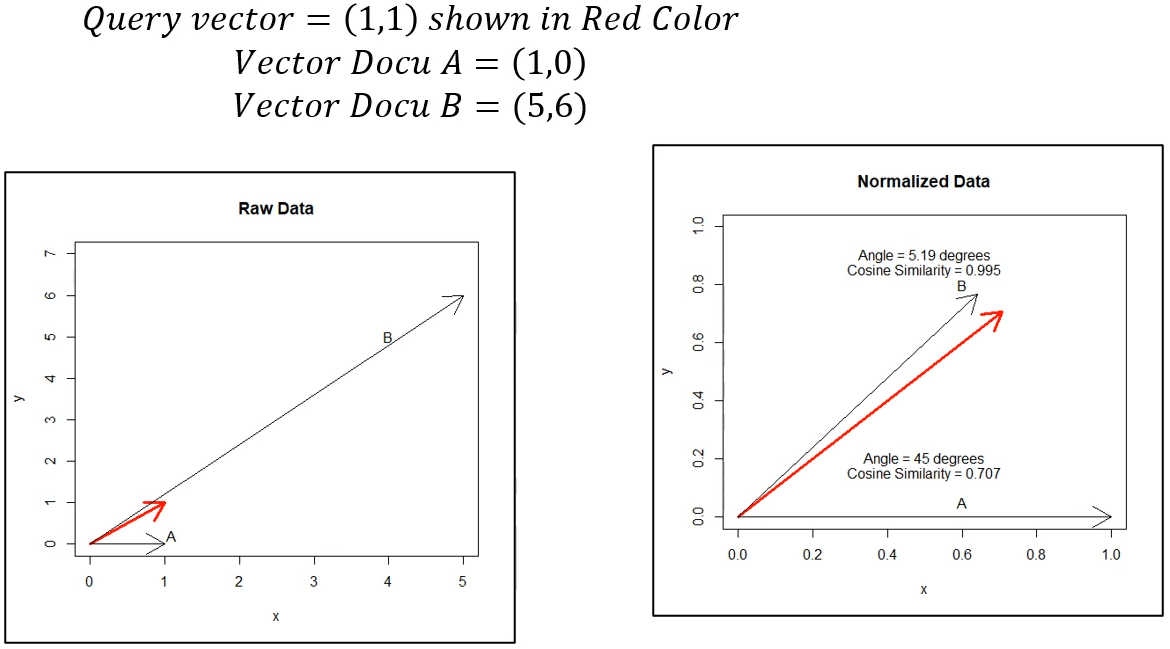

In [25]:
Image("../3. Images/Search Engine Cosine Similarity.png")

In [26]:
vector_query = np.array([1, 1])
vector_A = np.array([1, 0])
vector_B = np.array([5, 6])

In [27]:
normalized_query = vector_query / np.linalg.norm(vector_query)
normalized_query

array([ 0.70710678,  0.70710678])

In [28]:
normalized_vector_A = vector_A / np.linalg.norm(vector_A)
normalized_vector_A

array([ 1.,  0.])

In [30]:
normalized_vector_B = vector_B / np.linalg.norm(vector_B)
normalized_vector_B

array([ 0.6401844 ,  0.76822128])

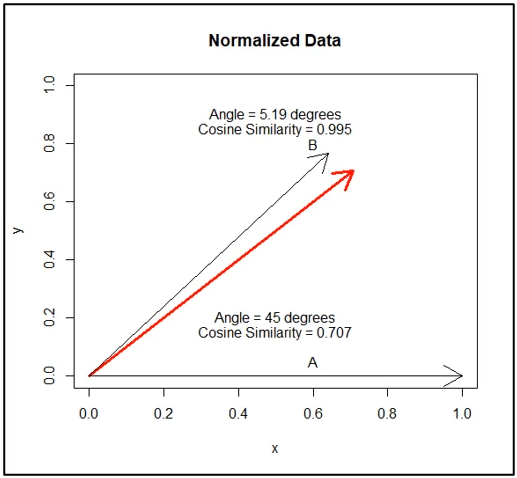

In [31]:
Image("../3. Images/Cosine Distance - Search Query and Website.png")

The <b>Cosine Similarity</b> is the dot product of the normalized vector.

In [40]:
def calculate_cosine_similarity(vector1: np.array, vector2: np.array, v1_name: str, v2_name: str):
    cosine_similarity = np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))
    print(f"Cosine Similarity between {v1_name} and {cosine_similarity}.")
    print(f"Angle between {v1_name} and {v2_name} is {math.acos(cosine_similarity) * 180 / math.pi} degrees.")
    print(f"Cosine Distance between {v1_name} and {v2_name} is {1 - cosine_similarity}.")

In [41]:
calculate_cosine_similarity(normalized_query, normalized_vector_A, "Query", "A")

Cosine Similarity between Query and 0.7071067811865476.
Angle between Query and A is 45.0 degrees.
Cosine Distance between Query and A is 0.2928932188134524.


In [42]:
calculate_cosine_similarity(normalized_query, normalized_vector_B, "Query", "B")

Cosine Similarity between Query and 0.9958932064677039.
Angle between Query and B is 5.1944289077348 degrees.
Cosine Distance between Query and B is 0.004106793532296149.


Vectorization is the process of transforming the data into a vector representation.

In NLP, there are several ways to vectorize data. In this section, we will cover the following - 

1. Bag of Words
2. Term Frequency (TF) (Word Frequency) x Inverse Document Frequency (IDF): Numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.
3. Word2Vec (Embedding): It uses neural network model to learn word associations from a large corpus of text. Once trained, the model can detect synonymous words or suggest additional words for a partial sentence.
4. BERT (Bidirectional Encoder Representations Transformer): Word2Vec embeddings remain constant regardless of the context. BERT embeddings are context sensitive.

<b>Bag of Words</b>

We put all the unique words in a bag. If the document contains one or more of the words, we use one-hot encoding to update the frequency. In this model, we disregard the grammar and the order of the words. 

In [43]:
doc_A = 'the man went out for a walk'
doc_B = 'the children sat around the fire'

In [44]:
bagOfWordsA = doc_A.split(' ')
print(bagOfWordsA)

['the', 'man', 'went', 'out', 'for', 'a', 'walk']


In [45]:
bagOfWordsB = doc_B.split(' ')
print(bagOfWordsB)

['the', 'children', 'sat', 'around', 'the', 'fire']


In [46]:
# Let's create a lexicon (which is a set of all words in both documents)
uniqueWords = set(bagOfWordsA).union(set(bagOfWordsB))
print(uniqueWords)

{'out', 'around', 'for', 'went', 'a', 'fire', 'children', 'walk', 'sat', 'man', 'the'}


In [47]:
# Create a dictionary of words and their occurence in each document
numOfWordsA = dict.fromkeys(uniqueWords, 0)
for word in bagOfWordsA:
    numOfWordsA[word] += 1

print(numOfWordsA)

{'out': 1, 'around': 0, 'for': 1, 'went': 1, 'a': 1, 'fire': 0, 'children': 0, 'walk': 1, 'sat': 0, 'man': 1, 'the': 1}


In [48]:
numOfWordsB = dict.fromkeys(uniqueWords, 0)
for word in bagOfWordsB:
    numOfWordsB[word] += 1

print(numOfWordsB)

{'out': 0, 'around': 1, 'for': 0, 'went': 0, 'a': 0, 'fire': 1, 'children': 1, 'walk': 0, 'sat': 1, 'man': 0, 'the': 2}


In [50]:
# Sort the dictionary

docSorted_A = sorted(numOfWordsA.items(), key=lambda x: x[0])
docSorted_B = sorted(numOfWordsB.items(), key=lambda x: x[0])

print(docSorted_A)
print(docSorted_B)

[('a', 1), ('around', 0), ('children', 0), ('fire', 0), ('for', 1), ('man', 1), ('out', 1), ('sat', 0), ('the', 1), ('walk', 1), ('went', 1)]
[('a', 0), ('around', 1), ('children', 1), ('fire', 1), ('for', 0), ('man', 0), ('out', 0), ('sat', 1), ('the', 2), ('walk', 0), ('went', 0)]


In [53]:
dfA  = pd.DataFrame(docSorted_A, columns=['Word', 'Frequency [A]'])
dfB  = pd.DataFrame(docSorted_B, columns=['Word', 'Frequency [B]'])
dfAB = pd.merge(dfA, dfB, on='Word', how='outer').fillna(0)
dfAB.set_index('Word', inplace=True)
dfAB

,Frequency [A],Frequency [B]
Word,,
a,1,0
around,0,1
children,0,1
fire,0,1
for,1,0
man,1,0
out,1,0
sat,0,1
the,1,2


In [54]:
# Computer Term Frequency (TF) - The number of times the word is appearing in the document divided by the total number of words in the document

def computeTF(wordDict, bagOfWords):
    tfDict = {}
    bagOfWordsCount = len(bagOfWords)
    for word, count in wordDict.items():
        tfDict[word] = count / float(bagOfWordsCount)
    return tfDict

In [61]:
tfA = computeTF(numOfWordsA, bagOfWordsA)
tfA_sorted = sorted(tfA.items(), key=lambda x: x[0])
df_tfA = pd.DataFrame(tfA_sorted, columns=['Word', 'TF [A]'])
final = pd.merge(dfAB, df_tfA, on='Word', how='outer').fillna(0)
final

,Word,Frequency [A],Frequency [B],TF [A]
0,a,1,0,0.142857
1,around,0,1,0.000000
2,children,0,1,0.000000
3,fire,0,1,0.000000
4,for,1,0,0.142857
5,man,1,0,0.142857
6,out,1,0,0.142857
7,sat,0,1,0.000000
8,the,1,2,0.142857
9,walk,1,0,0.142857


In [62]:
tfB = computeTF(numOfWordsB, bagOfWordsB)
tfB_sorted = sorted(tfB.items(), key=lambda x: x[0])
df_tfB = pd.DataFrame(tfB_sorted, columns=['Word', 'TF [B]'])
final = pd.merge(final, df_tfB, on='Word', how='outer').fillna(0)
final.set_index('Word', inplace=True)
final

,Frequency [A],Frequency [B],TF [A],TF [B]
Word,,,,
a,1,0,0.142857,0.000000
around,0,1,0.000000,0.166667
children,0,1,0.000000,0.166667
fire,0,1,0.000000,0.166667
for,1,0,0.142857,0.000000
man,1,0,0.142857,0.000000
out,1,0,0.142857,0.000000
sat,0,1,0.000000,0.166667
the,1,2,0.142857,0.333333


In [64]:
def print_words(list_words, numElementsRow):
    for j in range(0, len(list_words), numElementsRow):
        for i in range(j, j + numElementsRow):
            if (i >= len(list_words)):
                break
            print(i, '.', list_words[i], end=", ")
        print()
    print()

In [69]:
sentence = "The faster Harry got to the store, the faster Harry, the faster, would get home."

In [72]:
tokenizer = TreebankWordTokenizer()
tokens = tokenizer.tokenize(sentence.lower())
print_words(tokens, 5)

0 . the, 1 . faster, 2 . harry, 3 . got, 4 . to, 
5 . the, 6 . store, 7 . ,, 8 . the, 9 . faster, 
10 . harry, 11 . ,, 12 . the, 13 . faster, 14 . ,, 
15 . would, 16 . get, 17 . home, 18 . ., 



In [77]:
from collections import Counter

bagOfWords_sentence = Counter(tokens)
bagOfWords_sentence

Counter({'the': 4,
         'faster': 3,
         ',': 3,
         'harry': 2,
         'got': 1,
         'to': 1,
         'store': 1,
         'would': 1,
         'get': 1,
         'home': 1,
         '.': 1})

In [79]:
bagOfWords_sentence.most_common(4)

[('the', 4), ('faster', 3), (',', 3), ('harry', 2)]

In [81]:
# Calculate the Term Frequency for the word 'Harry'

times_harry_appeared = bagOfWords_sentence['harry']
total_words_in_doc = len(tokens)
tf = times_harry_appeared / total_words_in_doc
tf

0.10526315789473684

<h3 style = 'color:lightgreen'>1.3.2 Zipf Law</h3>

<b>Zipf's</b> law states that the importance of a word is inversely proportional to its rank. This means that the second item occurs approximately 1/2 as often as the first, and the third item 1/3 as often as the first, and so on. Zipf's law can be used to determine the relative importance of a word.

In [83]:
brown.words()[:10]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of']

In [84]:
# Remove punctuation from the words
puncs = [',', '.', '``', "''", ':', ';', '?', '(', ')', '[', ']', '--', '&', '!', '*', '@', '#', '$', '%', '...']
word_list = [word.lower() for word in brown.words() if word not in puncs and '_' not in word and ' ' not in word]

In [85]:
token_counts = Counter(word_list)
token_counts.most_common(10)

[('the', 69971),
 ('of', 36412),
 ('and', 28853),
 ('to', 26158),
 ('a', 23195),
 ('in', 21337),
 ('that', 10594),
 ('is', 10109),
 ('was', 9815),
 ('he', 9548)]

In [95]:
sorted_token_counts = OrderedDict(sorted(token_counts.items(), key= lambda x: x[1], reverse=True))
frequency_vector = np.array(list(sorted_token_counts.values()))
rank = np.arange(1, len(frequency_vector) + 1)

plt.clf()
plt.plot(np.log10(rank), np.log10(frequency_vector))
plt.savefig('Log10Graph.png')

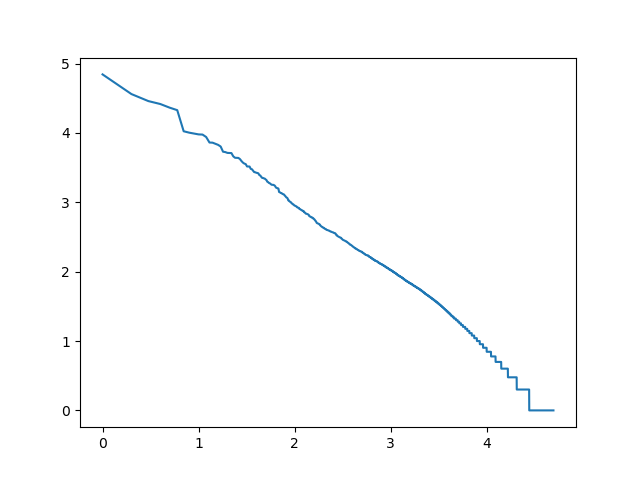

In [96]:
Image(r"H:\AI\NLP\UCSD\ucsd_nlp\1. Modules\Log10Graph.png")

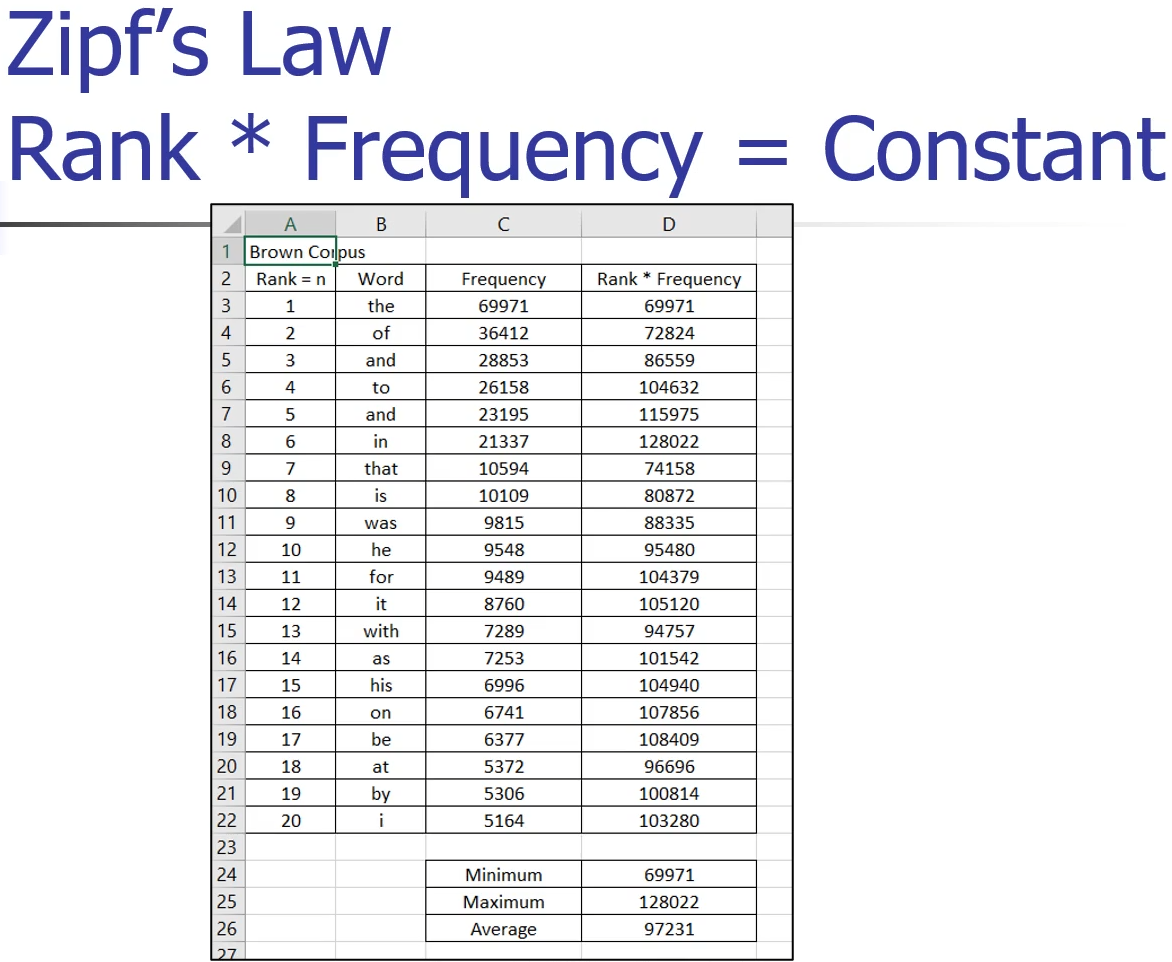

In [97]:
Image("../3. Images/Zipf Law.png")

<h3 style = 'color:lightgreen'>1.3.3 List Comprehension + NLP Pipeline</h3>

<h4 style = 'color:green'>1.3.3.1 List Comprehension</h4>

In [98]:
list1 = [1, 2, 3, 4, 5, 6]

In [100]:
list2 = [_ for _ in list1]
list2

[1, 2, 3, 4, 5, 6]

In [101]:
print([_ ** 3 for _ in list1])

[1, 8, 27, 64, 125, 216]


In [102]:
print([_ for _ in range(1, 11) if _ % 2 == 0])

[2, 4, 6, 8, 10]


In [103]:
color = ['red', 'green', 'blue', 'yellow', 'black', 'white']
print([_.upper() for _ in color])

['RED', 'GREEN', 'BLUE', 'YELLOW', 'BLACK', 'WHITE']


In [104]:
cubes = [(x, x ** 3) for x in range(1, 11)]
cubes

[(1, 1),
 (2, 8),
 (3, 27),
 (4, 64),
 (5, 125),
 (6, 216),
 (7, 343),
 (8, 512),
 (9, 729),
 (10, 1000)]

In [106]:
print([_ for _ in range(3, 30, 3)])

[3, 6, 9, 12, 15, 18, 21, 24, 27]


<h4 style = 'color:green'>1.3.3.2 Lambda Functions</h4>

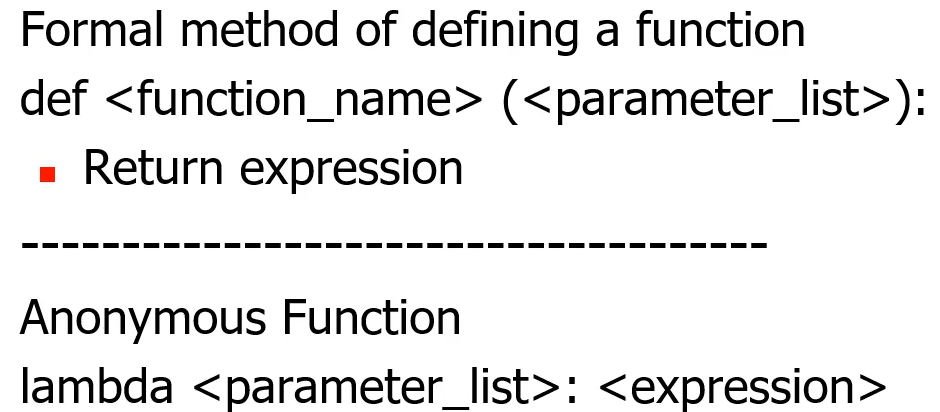

In [107]:
Image("../3. Images/Lambda Functions.png")

In [108]:
# Find all odd numbers
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9]
list(filter(lambda x: x % 2 != 0, numbers))

[1, 3, 5, 7, 9]

In [109]:
print(list(map(lambda x: x ** 2, numbers)))

[1, 4, 9, 16, 25, 36, 49, 64, 81]


<h4 style = 'color:green'>1.3.3.3 NLP Pipeline</h4>

<b>NLP Pipeline</b>

<ul>
    <li>Read and Explore Text</li>
    <li>Remove Punctuation</li>
    <li>Tokenize</li>
    <li>Remove Stop Words</li>
    <li>Lemmatize</li>
    <li>Vectorize</li>
    <li>ML Models</li>
    <li>DL Models</li>
    <li>GCP</li>
</ul>

<h5 style = 'color:darkgreen'>1.3.3.3.1 NLP Pipline - Load and Explore Text</h5>

In [110]:
raw_text = open(r'H:\AI\NLP\UCSD\ucsd_nlp\0. Data\SMSSpamCollection.txt').read()
raw_text[:100]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g'

In [111]:
parsed_data = raw_text.replace('\t', '\n').split('\n')
parsed_data[:10]

['ham',
 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham',
 'Ok lar... Joking wif u oni...',
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham',
 'U dun say so early hor... U c already then say...',
 'ham',
 "Nah I don't think he goes to usf, he lives around here though"]

In [112]:
label_list = parsed_data[0::2]
msg_list = parsed_data[1::2]
label_list[:5]

['ham', 'ham', 'spam', 'ham', 'ham']

In [113]:
combined_df = pd.DataFrame({
    'label': label_list[:-1],
    'message': msg_list
})
combined_df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [114]:
combined_df.shape

(5574, 2)

In [115]:
data = pd.read_csv(r'H:\AI\NLP\UCSD\ucsd_nlp\0. Data\SMSSpamCollection.txt', sep='\t', header=None)
data.columns = ['label', 'message']
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [116]:
# Explore Dataset

# Total number of records for ham and spam

data.groupby('label').count()

,message
label,
ham,4825
spam,747


In [117]:
# Missing values

data.isnull().sum()

label      0
message    0
dtype: int64

<h5 style = 'color:darkgreen'>1.3.3.3.2 NLP Pipline - Remove Punctuation</h5>

In [127]:
pd.set_option('display.max_colwidth', 75) # Default is 50
data.head()

,label,message,clean_msg
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la...",Go until jurong point crazy Available only in bugis n great world la e ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Tex...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though


In [128]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [129]:
def remove_punctuation(text):
    no_punc = "".join([c for c in text if c not in string.punctuation]) #"".join() is used to join the characters in the list
    return no_punc

In [130]:
data['clean_msg'] = data['message'].apply(lambda x: remove_punctuation(x))
data.head()

,label,message,clean_msg
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la...",Go until jurong point crazy Available only in bugis n great world la e ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Tex...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though


<h5 style = 'color:darkgreen'>1.3.3.3.3 NLP Pipline - Tokenize</h5>

In [131]:
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

In [133]:
data['clean_msg_tokenized'] = data['clean_msg'].apply(lambda x: tokenize(x.lower()))
data.head()

,label,message,clean_msg,clean_msg_tokenized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la...",Go until jurong point crazy Available only in bugis n great world la e ...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great,..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Tex...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"


<h5 style = 'color:darkgreen'>1.3.3.3.4 NLP Pipline - Remove Stop Words</h5>

In [134]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords.words('english')]
    return text

In [135]:
data['clean_msg_no_stopwords'] = data['clean_msg_tokenized'].apply(lambda x: remove_stopwords(x))
data.head()

,label,message,clean_msg,clean_msg_tokenized,clean_msg_no_stopwords
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la...",Go until jurong point crazy Available only in bugis n great world la e ...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great,...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, bu..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Tex...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"


<h5 style = 'color:darkgreen'>1.3.3.3.5 NLP Pipline - Lemmatize</h5>

In [137]:
ps = PorterStemmer()

In [138]:
ps.stem('grows')

'grow'

In [139]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

In [140]:
data['clean_msg_stemmed'] = data['clean_msg_no_stopwords'].apply(lambda x: stemming(x))
data.head()

,label,message,clean_msg,clean_msg_tokenized,clean_msg_no_stopwords,clean_msg_stemmed
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la...",Go until jurong point crazy Available only in bugis n great world la e ...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great,...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, bu...","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet,..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Tex...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005,..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"


In [141]:
def lemmatizing(tokenized_text):
    text = [Word(word).lemmatize() for word in tokenized_text]
    return text

In [142]:
data['clean_msg_lemmatized'] = data['clean_msg_no_stopwords'].apply(lambda x: lemmatizing(x))
data.head()

,label,message,clean_msg,clean_msg_tokenized,clean_msg_no_stopwords,clean_msg_stemmed,clean_msg_lemmatized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la...",Go until jurong point crazy Available only in bugis n great world la e ...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great,...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, bu...","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet,...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, bu..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Tex...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]"


<h3 style = 'color:lightgreen'>1.3.4 Count + nGram Vectorizer</h3>

In [144]:
cv = CountVectorizer()

In [145]:
corpus = ['the man went out for a walk', 'the children sat around the fire']

In [149]:
X = cv.fit(corpus)
print(cv.get_feature_names_out())

['around' 'children' 'fire' 'for' 'man' 'out' 'sat' 'the' 'walk' 'went']


In [150]:
print(X.vocabulary_)

{'the': 7, 'man': 4, 'went': 9, 'out': 5, 'for': 3, 'walk': 8, 'children': 1, 'sat': 6, 'around': 0, 'fire': 2}


In [153]:
final

,Frequency [A],Frequency [B],TF [A],TF [B]
Word,,,,
a,1,0,0.142857,0.000000
around,0,1,0.000000,0.166667
children,0,1,0.000000,0.166667
fire,0,1,0.000000,0.166667
for,1,0,0.142857,0.000000
man,1,0,0.142857,0.000000
out,1,0,0.142857,0.000000
sat,0,1,0.000000,0.166667
the,1,2,0.142857,0.333333


In [155]:
X = cv.fit_transform(corpus)
print(X)

  (0, 7)	1
  (0, 4)	1
  (0, 9)	1
  (0, 5)	1
  (0, 3)	1
  (0, 8)	1
  (1, 7)	2
  (1, 1)	1
  (1, 6)	1
  (1, 0)	1
  (1, 2)	1


In [156]:
df = pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out())
df

,around,children,fire,for,man,out,sat,the,walk,went
0,0,0,0,1,1,1,0,1,1,1
1,1,1,1,0,0,0,1,2,0,0


In [171]:
def clean_text(txt):
    txt = "".join([c for c in txt if c not in string.punctuation])
    tokens = re.split('\W+', txt)
    txt = [word for word in tokens if word not in stopwords.words('english')]
    txt = [Word(word).lemmatize() for word in txt]
    return txt

In [172]:
cv1 = CountVectorizer(analyzer=clean_text)
X1 = cv1.fit_transform(data['message'])
print(X1.shape)

(5572, 11045)


In [173]:
print(X1[0, :])

  (0, 2137)	1
  (0, 7536)	1
  (0, 8789)	1
  (0, 5886)	1
  (0, 1164)	1
  (0, 5379)	1
  (0, 8244)	1
  (0, 6965)	1
  (0, 10854)	1
  (0, 7642)	1
  (0, 6298)	1
  (0, 5378)	1
  (0, 1547)	1
  (0, 6936)	1
  (0, 4848)	1
  (0, 10676)	1


In [177]:
data = pd.read_csv(r'H:\AI\NLP\UCSD\ucsd_nlp\0. Data\SMSSpamCollection.txt', sep='\t', header=None)
data.columns = ['label', 'message']
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Tex...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [179]:
data_sample = data.iloc[0:10, :]
data_sample

,label,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Tex...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
5,spam,FreeMsg Hey there darling it's been 3 week's now and no word back! I'd ...
6,ham,Even my brother is not like to speak with me. They treat me like aids p...
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' ...
8,spam,WINNER!! As a valued network customer you have been selected to receive...
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest...


In [180]:
cv2 = CountVectorizer(analyzer=clean_text)
X2 = cv2.fit_transform(data_sample['message'])
print(X2.shape)

(10, 136)


In [181]:
df = pd.DataFrame(X2.toarray(), columns=cv2.get_feature_names_out())
df.head(10)

,08002986030,08452810075over18s,09061701461,11,12,150,2,2005,21st,3,...,u,usf,valued,wat,week,wif,win,wkly,word,world
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [182]:
data[data['message'].str.contains('08002986030')]

,label,message
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest...
4162,spam,Had your mobile 11 months or more? U R entitled to Update to the latest...
